# Xgboost Feature Importance

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from numpy import loadtxt
from xgboost import XGBClassifier,XGBRegressor


In [2]:
df_merged_top = pd.read_csv('./oil_merge_13.csv')

df_merged_top.rename(columns = {'Henry Hub Natural Gas Spot Price Dollars per Million Btu':'Henry_hub_natural_gas_spot'}, inplace = True)

df = df_merged_top.sort_values(by='Date').sort_values(by='Date')

In [3]:
df

,Date,WTI_dollar_per_barrel,copper_close,dji_index,gold_close,eur_close,Henry_hub_natural_gas_spot,rub_close,silver_close,nasdaq_close,SP500,pal_close,corn_close,heat_close
0,2003-12-01,29.89,0.9555,9899.049805,402.700012,0.83577,5.02,29.700001,5.445,1989.819946,1070.119995,189.000000,246.50,0.8340
1,2003-12-02,30.74,0.9695,9853.639648,403.700012,0.82720,5.45,29.690001,5.496,1980.069946,1066.619995,192.750000,245.75,0.8626
2,2003-12-03,30.61,0.9760,9873.419922,403.899994,0.82488,5.45,29.690001,5.468,1960.250000,1064.729980,192.350006,249.25,0.8662
3,2003-12-04,31.24,0.9630,9930.820312,403.299988,0.82775,5.70,29.680000,5.452,1968.800049,1069.719971,198.399994,246.75,0.8819
4,2003-12-05,30.68,0.9690,9862.679688,406.399994,0.82055,6.27,29.620001,5.472,1937.819946,1061.500000,201.300003,246.50,0.8636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,2021-12-27,75.49,2.2000,20087.199219,1478.599976,0.91228,3.45,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4700,2021-12-28,76.01,2.2000,20087.199219,1478.599976,0.91228,3.32,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4701,2021-12-29,76.58,2.2000,20087.199219,1478.599976,0.91228,3.40,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4702,2021-12-30,76.83,2.2000,20087.199219,1478.599976,0.91228,3.82,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417


# Scaling

In [30]:

# Normalize every column in the DataFrame using Min-Max scaling
def normalize_all_columns(df):
    normalized_df = df.copy()
    for column in normalized_df.columns[1:]:
        # print(column)
        max_val = normalized_df[column].max()
        min_val = normalized_df[column].min()
        normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
    return normalized_df

# Denormalize every column in the DataFrame using Min-Max scaling
def denormalize_all_columns(normalized_df):
    denormalized_df = normalized_df.copy()
    for column in denormalized_df.columns[1:]:
        # print("~" + column)
        max_val = df[column].max()
        min_val = df[column].min()
        denormalized_df[column] = denormalized_df[column] * (max_val - min_val) + min_val
    return denormalized_df

def denormalize_WTI(x):
    max_val = df['WTI_dollar_per_barrel'].max()
    min_val = df['WTI_dollar_per_barrel'].min()
    denormalized = x * (max_val - min_val) + min_val
    return denormalized
    

In [5]:
normalized_df = normalize_all_columns(df)

In [6]:
denormalized_df = denormalize_all_columns(normalized_df)

# Train/Test Split

In [45]:
from sklearn.model_selection import train_test_split

data = df.iloc[:,1:].copy()
normalized_data = normalized_df.iloc[:,1:].copy()

X = data.iloc[:,1:]  #independent columns
Y = data.iloc[:,0]    #target column (WTI Oil price)

X_normalized = normalized_data.iloc[:,1:] 
Y_normalized = normalized_data.iloc[:,0]



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
X_train.shape

(3151, 12)

In [47]:
X_train_nor, X_test_nor, y_train_nor, y_test_nor = train_test_split(X_normalized, Y_normalized, test_size=0.33, random_state=7)
X_train_nor.shape

(3151, 12)

# XGboost

XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm for both classification and regression tasks. It is an ensemble learning method that uses decision trees as base learners. Feature importance in XGBoost refers to determining the significance of each feature (predictor or input variable) in making predictions. Knowing which features are important can help you understand your model better and potentially improve its performance. It's based on the gradient boosting framework. Boosting is a technique that combines weak learners to create a strong learner. XGBoost builds an ensemble of decision trees sequentially, with each tree trying to correct the errors made by the previous ones.




In [10]:
data = df.iloc[:,1:].copy()
normalized_data = normalized_df.iloc[:,1:].copy()

X = data.iloc[:,1:]  #independent columns
Y = data.iloc[:,0]    #target column (WTI Oil price)

X_normalized = normalized_data.iloc[:,1:] 
Y_normalized = normalized_data.iloc[:,0]

### XGBoost Feature importance by gain

In [110]:
import xgboost as xgb

model = xgb.XGBRegressor()
# model.fit(X_normalized, Y_normalized)
model.fit(X, Y)


feature_importance = model.get_booster().get_score(importance_type='gain')
# feature_importance = model.get_booster().get_fscore()
# importance = model.get_booster().get_score(importance_type='cover')


C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [111]:
feature_importance

{'copper_close': 23.513608932495117,
 'dji_index': 216.59542846679688,
 'gold_close': 63.02128219604492,
 'eur_close': 300.7078857421875,
 'Henry_hub_natural_gas_spot': 64.71966552734375,
 'rub_close': 236.5986328125,
 'silver_close': 39.153079986572266,
 'nasdaq_close': 46.30628967285156,
 'SP500': 717.5422973632812,
 'pal_close': 38.549659729003906,
 'corn_close': 59.32916259765625,
 'heat_close': 8750.6279296875}

In [112]:
feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1]))

In [113]:
feature_importance

{'copper_close': 23.513608932495117,
 'pal_close': 38.549659729003906,
 'silver_close': 39.153079986572266,
 'nasdaq_close': 46.30628967285156,
 'corn_close': 59.32916259765625,
 'gold_close': 63.02128219604492,
 'Henry_hub_natural_gas_spot': 64.71966552734375,
 'dji_index': 216.59542846679688,
 'rub_close': 236.5986328125,
 'eur_close': 300.7078857421875,
 'SP500': 717.5422973632812,
 'heat_close': 8750.6279296875}

## Without scaling

C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

[0.00222737 0.02051741 0.00596981 0.02848512 0.00613069 0.02241225
 0.00370885 0.00438645 0.06797054 0.00365169 0.00562007 0.8289197 ]


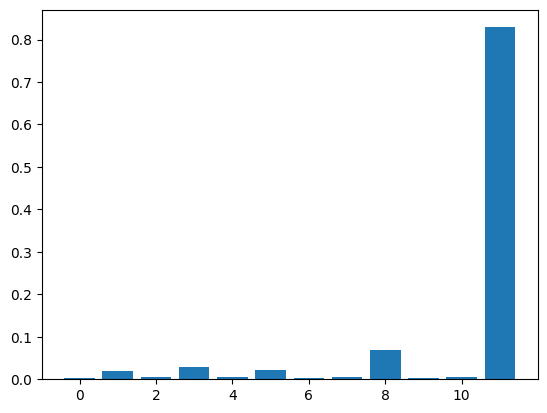

In [81]:
# fit model no training data
model = XGBRegressor()
model.fit(X, Y)

# feature importance
print(model.feature_importances_)

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

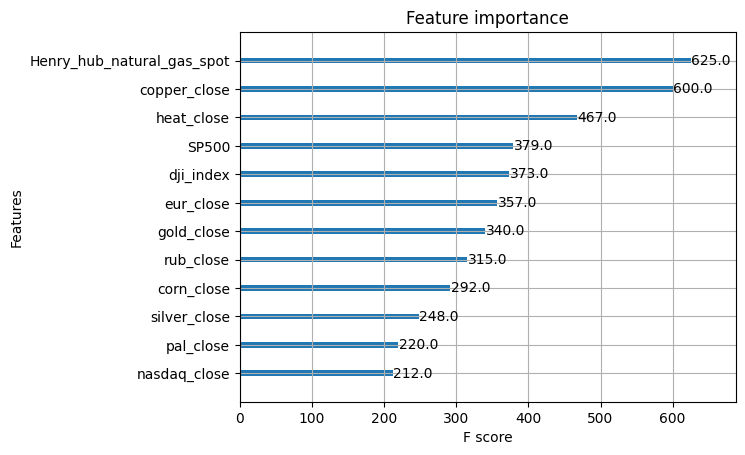

In [82]:
# visualizing the above plot
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

## With scaling

C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

[0.00256548 0.02248962 0.00584323 0.02772241 0.00640068 0.02433253
 0.00346852 0.00427871 0.07333992 0.00350087 0.00561824 0.82043976]


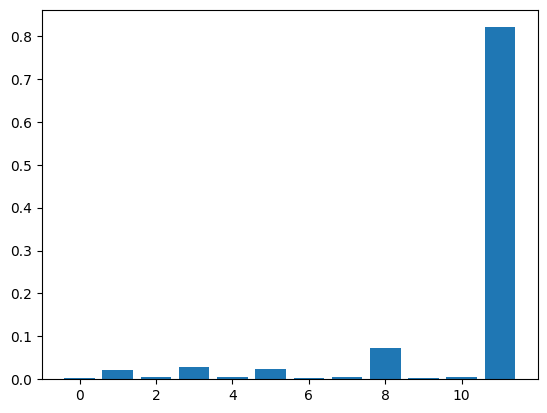

In [22]:
# fit model no training data
model_nor = XGBRegressor()
model_nor.fit(X_normalized, Y_normalized)

# feature importance
print(model_nor.feature_importances_)

# plot
pyplot.bar(range(len(model_nor.feature_importances_)), model_nor.feature_importances_)
pyplot.show()

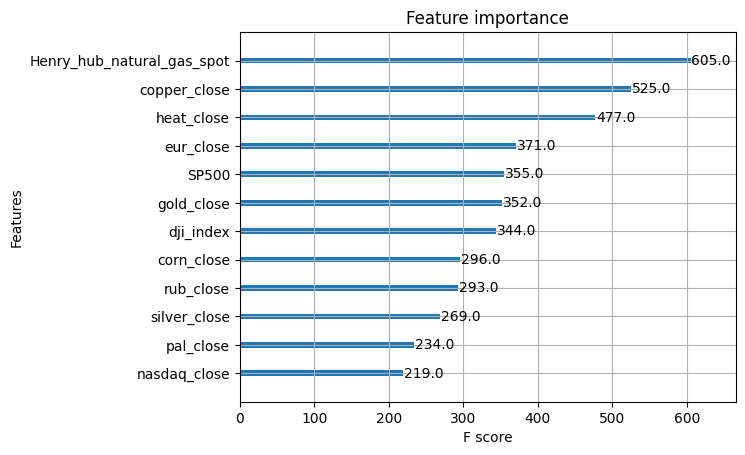

In [23]:
# visualizing the above plot
from xgboost import plot_importance
plot_importance(model_nor)
pyplot.show()

# Evaluate

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot

def plot_result(X_train, y_train, Xt, yt):
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    #multi-layer perceptron model
    Mregr =  MLPRegressor(random_state=1, max_iter=2000)

    model = Mregr
    
    model.fit(X_train, y_train)
    pred = model.predict(Xt)
    print('MSE : ')
    print(mean_squared_error(yt.tolist(), pred))

    #plotting
    #pyplot.figure(figsize=(12,8), dpi= 50)
    pyplot.figure(figsize=(20,5))

    pyplot.plot(pred, color='red')
    pyplot.plot(yt.tolist(), color='green')
    pyplot.legend(['pred','actaul'])

## OG

MSE : 
137.79689375496113


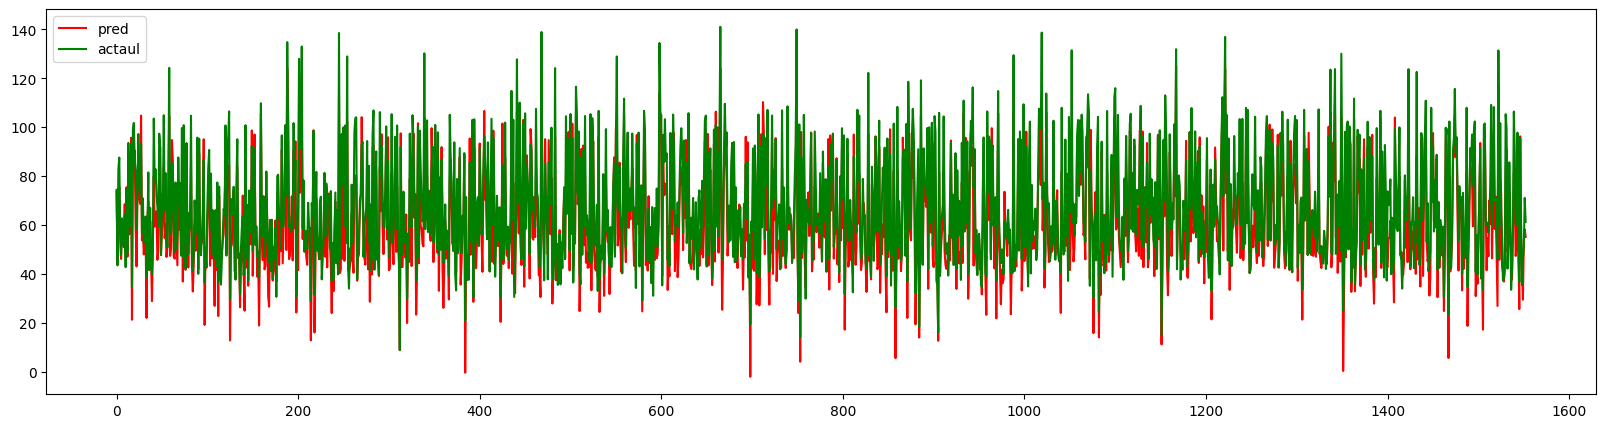

In [75]:
#OG
plot_result(X_train, y_train, X_test, y_test)

## without scaling

In [76]:
df.columns

Index(['Date', 'WTI_dollar_per_barrel', 'copper_close', 'dji_index',
       'gold_close', 'eur_close', 'Henry_hub_natural_gas_spot', 'rub_close',
       'silver_close', 'nasdaq_close', 'SP500', 'pal_close', 'corn_close',
       'heat_close'],
      dtype='object')

In [77]:
features_selected = ['Henry_hub_natural_gas_spot', 'copper_close', 'heat_close']

In [78]:
X_train_selected = X_train[features_selected]
X_test_selected = X_test[features_selected]

MSE : 
46.565670696166706


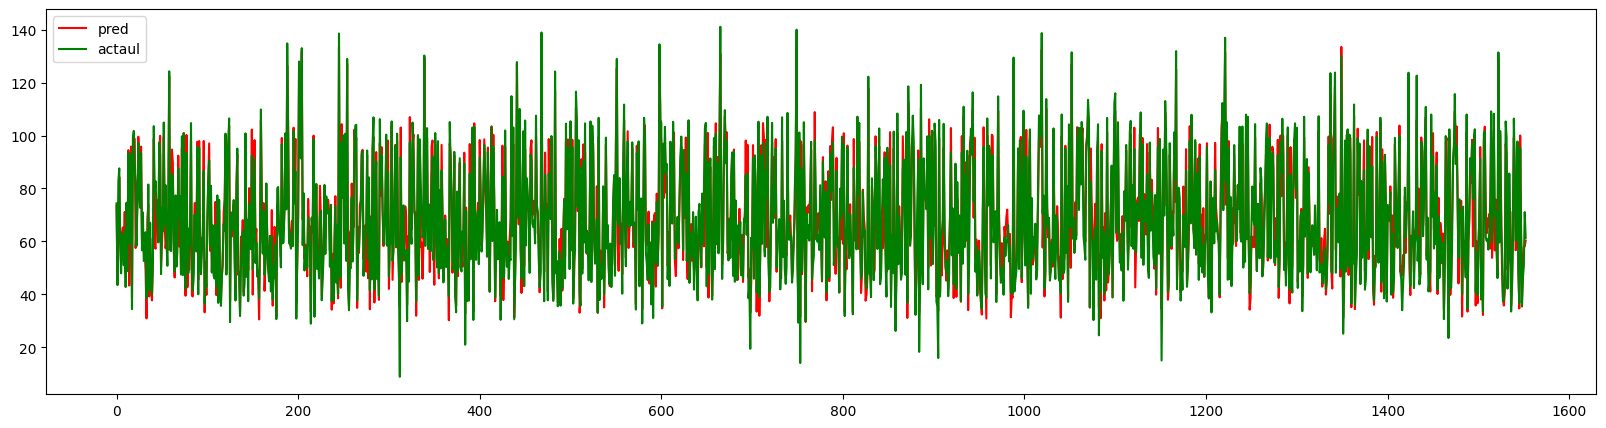

In [79]:
plot_result(X_train_selected, y_train, X_test_selected, y_test)

## With Scaling

In [72]:
X_train_selected_nor = X_train_nor[features_selected]
X_test_selected_nor = X_test_nor[features_selected]

MSE : 
0.0027028156269019096


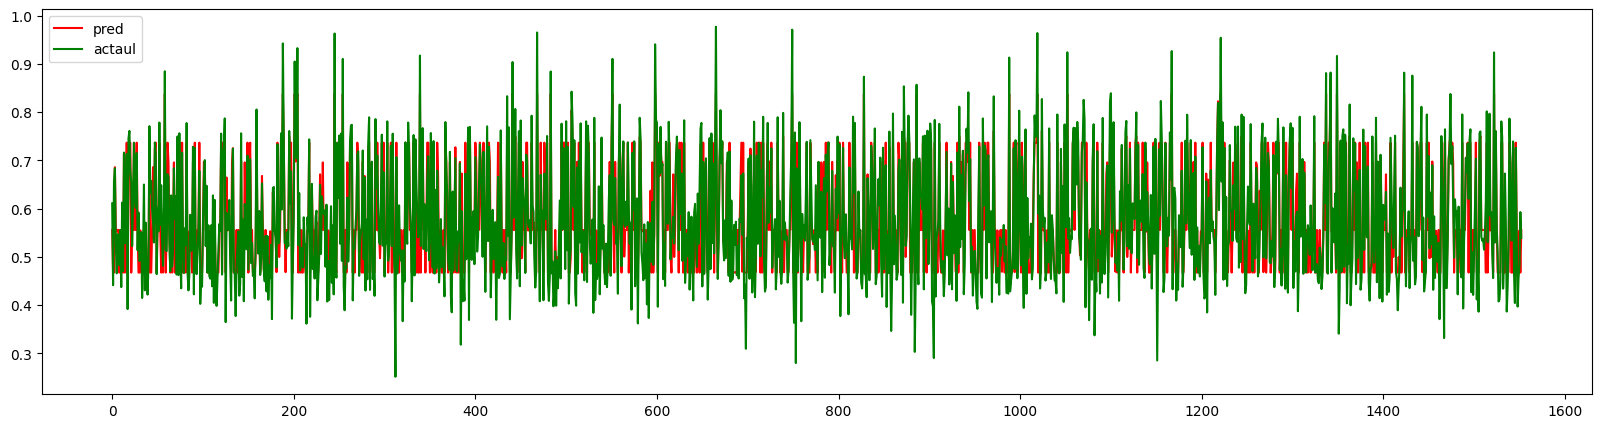

In [73]:
plot_result(X_train_nor, y_train_nor, X_test_nor, y_test_nor)